Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
# %%capture
# ! pip install git+https://github.com/LegrandNico/metadPy.git
# ! pip install numpyro

In [2]:
import arviz as az
import numpyro
from metadPy import load_dataset
from metadPy.bayesian import hmetad

# Set the number of cores used by Numpyro
numpyro.set_host_device_count(2)

# Fitting data at the group level

## From data frame

In [3]:
# Load data
group_df = load_dataset("rm")
this_df = group_df[group_df.Condition == 0]

This function will return two variable. The first one is a pymc model variable

In [4]:
model, traces = hmetad(
    data=this_df,
    nRatings=4,
    stimuli="Stimuli",
    accuracy="Accuracy",
    confidence="Confidence",
    subject="Subject",
    backend="numpyro",
)

/opt/anaconda3/lib/python3.8/site-packages/metadPy/bayesian.py:357: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 2. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(
  0%|          | 0/2000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/jax/_src/tree_util.py:188: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  warnings.warn('jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() '
  0%|          | 0/2000 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/jax/_src/tree_util.py:188: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacemen

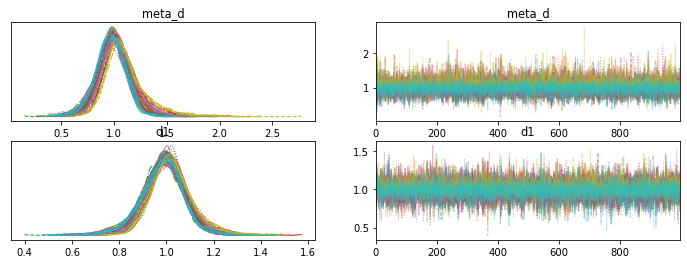

In [5]:
az.plot_trace(traces, var_names=["meta_d", "d1"]);

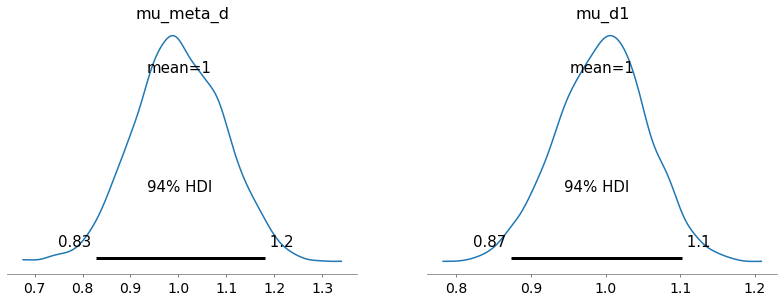

In [6]:
az.plot_posterior(traces, var_names=["mu_meta_d", "mu_d1"]);

In [7]:
az.summary(traces, var_names=["mu_meta_d", "mu_d1"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_meta_d,1.001,0.095,0.827,1.180,0.001,0.001,5383.0,2829.0,1.0
mu_d1,0.996,0.061,0.873,1.102,0.001,0.001,5202.0,2736.0,1.0


# Watermark

In [8]:
%load_ext watermark
%watermark -n -u -v -iv -w -p metadPy,pymc

Last updated: Wed Jun 29 2022

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.3.0

metadPy: 0.0.1
pymc   : 4.0.1

sys    : 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
arviz  : 0.12.1
numpyro: 0.9.1

Watermark: 2.3.1

